In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
from collections import Counter
from sklearn.utils import shuffle
from sklearn.preprocessing import StandardScaler
from sklearn.linear_model import LogisticRegression
from sklearn.model_selection import train_test_split
pd.set_option("max_columns",1000)

In [2]:
df_train = pd.read_csv('./house/train.csv')
df_test  = pd.read_csv('./house/test.csv')
df_sub   = pd.read_csv('./house/sample_submission.csv')

In [3]:
df_train.head()

,Id,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,1,60,RL,65.0,8450,Pave,NaN,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,NaN,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,NaN,NaN,NaN,0,2,2008,WD,Normal,208500
1,2,20,RL,80.0,9600,Pave,NaN,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,NaN,NaN,NaN,0,5,2007,WD,Normal,181500
2,3,60,RL,68.0,11250,Pave,NaN,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,NaN,NaN,NaN,0,9,2008,WD,Normal,223500
3,4,70,RL,60.0,9550,Pave,NaN,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,NaN,NaN,NaN,0,2,2006,WD,Abnorml,140000
4,5,60,RL,84.0,14260,Pave,NaN,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,NaN,NaN,NaN,0,12,2008,WD,Normal,250000


In [4]:
df_train.columns

Index(['Id', 'MSSubClass', 'MSZoning', 'LotFrontage', 'LotArea', 'Street',
       'Alley', 'LotShape', 'LandContour', 'Utilities', 'LotConfig',
       'LandSlope', 'Neighborhood', 'Condition1', 'Condition2', 'BldgType',
       'HouseStyle', 'OverallQual', 'OverallCond', 'YearBuilt', 'YearRemodAdd',
       'RoofStyle', 'RoofMatl', 'Exterior1st', 'Exterior2nd', 'MasVnrType',
       'MasVnrArea', 'ExterQual', 'ExterCond', 'Foundation', 'BsmtQual',
       'BsmtCond', 'BsmtExposure', 'BsmtFinType1', 'BsmtFinSF1',
       'BsmtFinType2', 'BsmtFinSF2', 'BsmtUnfSF', 'TotalBsmtSF', 'Heating',
       'HeatingQC', 'CentralAir', 'Electrical', '1stFlrSF', '2ndFlrSF',
       'LowQualFinSF', 'GrLivArea', 'BsmtFullBath', 'BsmtHalfBath', 'FullBath',
       'HalfBath', 'BedroomAbvGr', 'KitchenAbvGr', 'KitchenQual',
       'TotRmsAbvGrd', 'Functional', 'Fireplaces', 'FireplaceQu', 'GarageType',
       'GarageYrBlt', 'GarageFinish', 'GarageCars', 'GarageArea', 'GarageQual',
       'GarageCond', 'PavedDrive

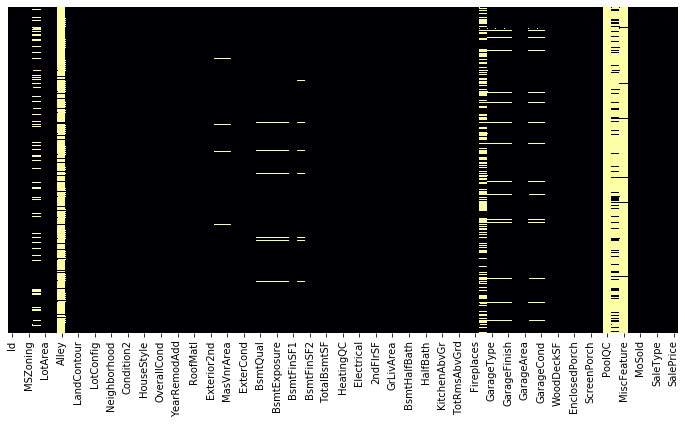

In [5]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [6]:
for i in df_train.columns.tolist():
    if len(df_train.iloc[df_train[i].isnull().values==True]) == 0:
        continue
    print("{:15}{}".format(i,len(df_train.iloc[df_train[i].isnull().values==True])))

LotFrontage    259
Alley          1369
MasVnrType     8
MasVnrArea     8
BsmtQual       37
BsmtCond       37
BsmtExposure   38
BsmtFinType1   37
BsmtFinType2   38
Electrical     1
FireplaceQu    690
GarageType     81
GarageYrBlt    81
GarageFinish   81
GarageQual     81
GarageCond     81
PoolQC         1453
Fence          1179
MiscFeature    1406


In [7]:
def Fill(x):
    def colFill(colList):
        col = colList[0]
        if pd.isnull(col):
            return "no" + x
        else:
            return col
    return colFill

fillList = ["Alley","BsmtQual","BsmtCond","BsmtExposure","BsmtFinType1","BsmtFinType2","FireplaceQu","GarageFinish","GarageQual","GarageCond","PoolQC","Fence","MiscFeature","GarageType"]
for i in fillList:
    df_train[i] = df_train[[i]].apply(Fill(i),axis=1)
    df_test[i] = df_test[[i]].apply(Fill(i),axis=1)
df_train["GarageYrBlt"].fillna(value=0,inplace=True)
df_test["GarageYrBlt"].fillna(value=0,inplace=True)

df_test.drop(["Id"],axis=1,inplace=True)
df_train.drop(["Id"],axis=1,inplace=True)

In [8]:
df_train.head()

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition,SalePrice
0,60,RL,65.0,8450,Pave,noAlley,Reg,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2003,2003,Gable,CompShg,VinylSd,VinylSd,BrkFace,196.0,Gd,TA,PConc,Gd,TA,No,GLQ,706,Unf,0,150,856,GasA,Ex,Y,SBrkr,856,854,0,1710,1,0,2,1,3,1,Gd,8,Typ,0,noFireplaceQu,Attchd,2003.0,RFn,2,548,TA,TA,Y,0,61,0,0,0,0,noPoolQC,noFence,noMiscFeature,0,2,2008,WD,Normal,208500
1,20,RL,80.0,9600,Pave,noAlley,Reg,Lvl,AllPub,FR2,Gtl,Veenker,Feedr,Norm,1Fam,1Story,6,8,1976,1976,Gable,CompShg,MetalSd,MetalSd,None,0.0,TA,TA,CBlock,Gd,TA,Gd,ALQ,978,Unf,0,284,1262,GasA,Ex,Y,SBrkr,1262,0,0,1262,0,1,2,0,3,1,TA,6,Typ,1,TA,Attchd,1976.0,RFn,2,460,TA,TA,Y,298,0,0,0,0,0,noPoolQC,noFence,noMiscFeature,0,5,2007,WD,Normal,181500
2,60,RL,68.0,11250,Pave,noAlley,IR1,Lvl,AllPub,Inside,Gtl,CollgCr,Norm,Norm,1Fam,2Story,7,5,2001,2002,Gable,CompShg,VinylSd,VinylSd,BrkFace,162.0,Gd,TA,PConc,Gd,TA,Mn,GLQ,486,Unf,0,434,920,GasA,Ex,Y,SBrkr,920,866,0,1786,1,0,2,1,3,1,Gd,6,Typ,1,TA,Attchd,2001.0,RFn,2,608,TA,TA,Y,0,42,0,0,0,0,noPoolQC,noFence,noMiscFeature,0,9,2008,WD,Normal,223500
3,70,RL,60.0,9550,Pave,noAlley,IR1,Lvl,AllPub,Corner,Gtl,Crawfor,Norm,Norm,1Fam,2Story,7,5,1915,1970,Gable,CompShg,Wd Sdng,Wd Shng,None,0.0,TA,TA,BrkTil,TA,Gd,No,ALQ,216,Unf,0,540,756,GasA,Gd,Y,SBrkr,961,756,0,1717,1,0,1,0,3,1,Gd,7,Typ,1,Gd,Detchd,1998.0,Unf,3,642,TA,TA,Y,0,35,272,0,0,0,noPoolQC,noFence,noMiscFeature,0,2,2006,WD,Abnorml,140000
4,60,RL,84.0,14260,Pave,noAlley,IR1,Lvl,AllPub,FR2,Gtl,NoRidge,Norm,Norm,1Fam,2Story,8,5,2000,2000,Gable,CompShg,VinylSd,VinylSd,BrkFace,350.0,Gd,TA,PConc,Gd,TA,Av,GLQ,655,Unf,0,490,1145,GasA,Ex,Y,SBrkr,1145,1053,0,2198,1,0,2,1,4,1,Gd,9,Typ,1,TA,Attchd,2000.0,RFn,3,836,TA,TA,Y,192,84,0,0,0,0,noPoolQC,noFence,noMiscFeature,0,12,2008,WD,Normal,250000


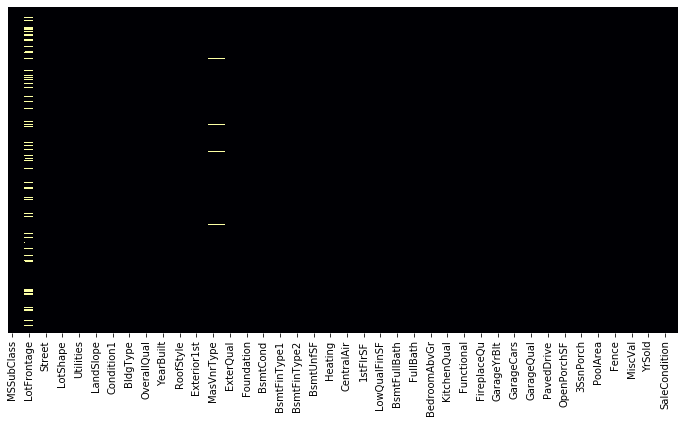

In [9]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [10]:
temp1 = df_train.iloc[df_train["LotFrontage"].isnull().values==False]
a = temp1["LotArea"] / temp1["LotFrontage"]

In [11]:
def LotAreaCvLotFrontage(col):
    LotFrontage = col[0]
    LotArea = col[1]
    if pd.isnull(LotFrontage):
        return LotArea // a.mean()
    else:
        return LotFrontage
    
df_train["LotFrontage"] = df_train[["LotFrontage","LotArea"]].apply(LotAreaCvLotFrontage,axis = 1)
df_test["LotFrontage"] = df_test[["LotFrontage","LotArea"]].apply(LotAreaCvLotFrontage,axis = 1)

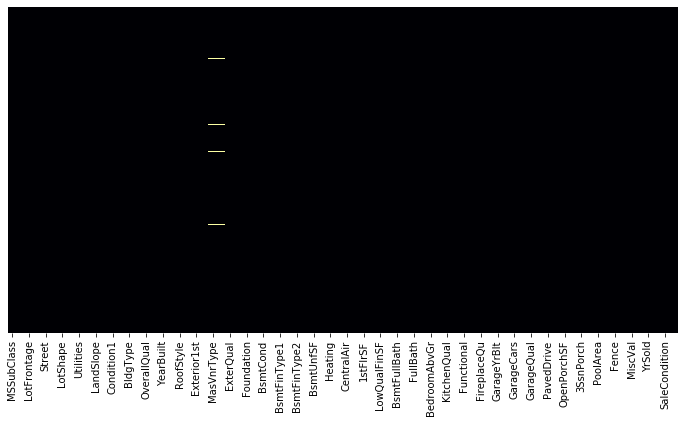

In [12]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="inferno")

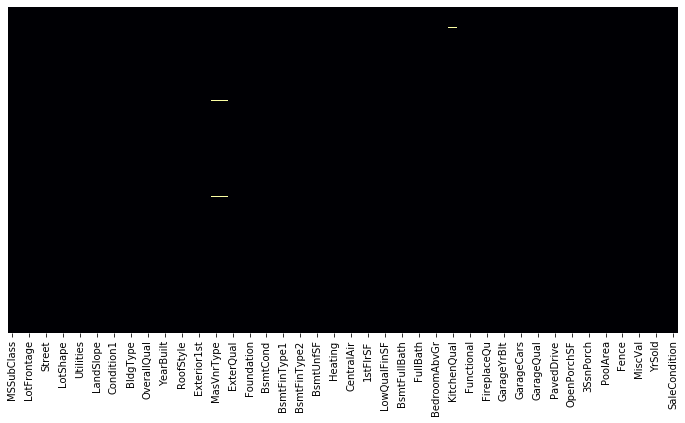

In [13]:
plt.figure(figsize=(12,6))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [14]:
df_train["MasVnrType"].fillna(value="None",inplace=True)
df_train["MasVnrArea"].fillna(value=0,inplace=True)
df_train["Electrical"].fillna(value="SBrkr",inplace=True)

df_test["MasVnrType"].fillna(value="None",inplace=True)
df_test["MasVnrArea"].fillna(value=0,inplace=True)
df_test["Electrical"].fillna(value="SBrkr",inplace=True)
# len(df_train["MasVnrType"].isnull().values == False)


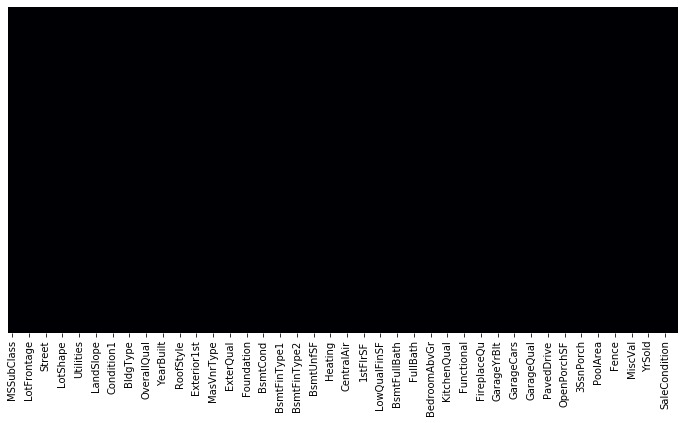

In [15]:
plt.figure(figsize=(12,6))
sns.heatmap(df_train.isnull(),yticklabels=False,cbar=False,cmap="inferno")

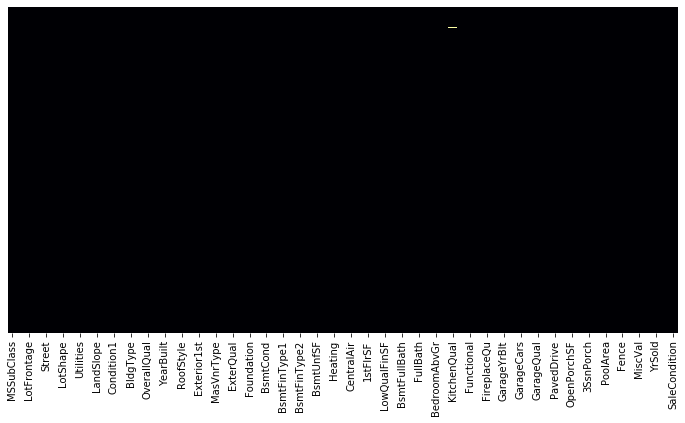

In [16]:
plt.figure(figsize=(12,6))
sns.heatmap(df_test.isnull(),yticklabels=False,cbar=False,cmap="inferno")

In [17]:
for i in df_test.columns.tolist():
    if len(df_test.iloc[df_test[i].isnull().values==True]) == 0:
        continue
    print("{:15}{}".format(i,len(df_test.iloc[df_test[i].isnull().values==True])))

MSZoning       4
Utilities      2
Exterior1st    1
Exterior2nd    1
BsmtFinSF1     1
BsmtFinSF2     1
BsmtUnfSF      1
TotalBsmtSF    1
BsmtFullBath   2
BsmtHalfBath   2
KitchenQual    1
Functional     2
GarageCars     1
GarageArea     1
SaleType       1


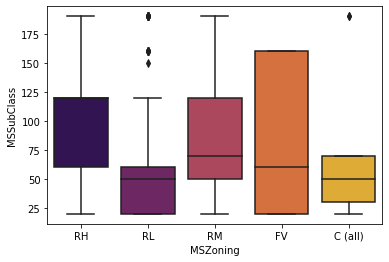

In [18]:
sns.boxplot('MSZoning','MSSubClass',data = df_test, palette = 'inferno')

In [19]:
def fillMSZoning(x):
    MSZoning = x[0]
    MSSubClass = x[1]
    
    if pd.isnull(MSZoning):
        if MSSubClass > 60:
            return "RH"
        elif MSSubClass <= 60 and MSSubClass > 50:
            return "RM"
        else:
            return "RL"
    else:
        return MSZoning
df_test["MSZoning"] = df_test[["MSZoning","MSSubClass"]].apply(fillMSZoning,axis=1)

In [20]:
df_test.iloc[df_test["Utilities"].isnull().values==True]

,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
455,30,RL,109.0,21780,Grvl,noAlley,Reg,Lvl,NaN,Inside,Gtl,IDOTRR,Norm,Norm,1Fam,1Story,2,4,1910,1950,Gable,CompShg,Wd Sdng,Wd Sdng,None,0.0,Fa,Fa,CBlock,noBsmtQual,noBsmtCond,noBsmtExposure,noBsmtFinType1,0.0,noBsmtFinType2,0.0,0.0,0.0,GasA,TA,N,FuseA,810,0,0,810,0.0,0.0,1,0,1,1,TA,4,Min1,0,noFireplaceQu,Detchd,1975.0,Unf,1.0,280.0,TA,TA,N,119,24,0,0,0,0,noPoolQC,noFence,noMiscFeature,0,3,2009,ConLD,Normal
485,20,RL,219.0,31220,Pave,noAlley,IR1,Bnk,NaN,FR2,Gtl,Gilbert,Feedr,Norm,1Fam,1Story,6,2,1952,1952,Hip,CompShg,BrkFace,BrkFace,None,0.0,TA,TA,CBlock,TA,TA,No,Unf,0.0,Unf,0.0,1632.0,1632.0,GasA,TA,Y,FuseA,1474,0,0,1474,0.0,0.0,1,0,3,1,TA,7,Min2,2,Gd,Attchd,1952.0,Unf,2.0,495.0,TA,TA,Y,0,0,144,0,0,0,noPoolQC,noFence,Shed,750,5,2008,WD,Normal


In [21]:
df_test["Utilities"].fillna(value="AllPub",inplace=True)

In [22]:
df_test.fillna(method="pad",inplace=True)

In [23]:
for i in df_train.columns:
    if df_train[i].dtype == "object":
        df_train[i] = i + df_train[i]

for i in df_test.columns:
    if df_test[i].dtype == "object":
        df_test[i] = i + df_test[i]
df_test.head()


,MSSubClass,MSZoning,LotFrontage,LotArea,Street,Alley,LotShape,LandContour,Utilities,LotConfig,LandSlope,Neighborhood,Condition1,Condition2,BldgType,HouseStyle,OverallQual,OverallCond,YearBuilt,YearRemodAdd,RoofStyle,RoofMatl,Exterior1st,Exterior2nd,MasVnrType,MasVnrArea,ExterQual,ExterCond,Foundation,BsmtQual,BsmtCond,BsmtExposure,BsmtFinType1,BsmtFinSF1,BsmtFinType2,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,Heating,HeatingQC,CentralAir,Electrical,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,KitchenQual,TotRmsAbvGrd,Functional,Fireplaces,FireplaceQu,GarageType,GarageYrBlt,GarageFinish,GarageCars,GarageArea,GarageQual,GarageCond,PavedDrive,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,PoolQC,Fence,MiscFeature,MiscVal,MoSold,YrSold,SaleType,SaleCondition
0,20,MSZoningRH,80.0,11622,StreetPave,AlleynoAlley,LotShapeReg,LandContourLvl,UtilitiesAllPub,LotConfigInside,LandSlopeGtl,NeighborhoodNAmes,Condition1Feedr,Condition2Norm,BldgType1Fam,HouseStyle1Story,5,6,1961,1961,RoofStyleGable,RoofMatlCompShg,Exterior1stVinylSd,Exterior2ndVinylSd,MasVnrTypeNone,0.0,ExterQualTA,ExterCondTA,FoundationCBlock,BsmtQualTA,BsmtCondTA,BsmtExposureNo,BsmtFinType1Rec,468.0,BsmtFinType2LwQ,144.0,270.0,882.0,HeatingGasA,HeatingQCTA,CentralAirY,ElectricalSBrkr,896,0,0,896,0.0,0.0,1,0,2,1,KitchenQualTA,5,FunctionalTyp,0,FireplaceQunoFireplaceQu,GarageTypeAttchd,1961.0,GarageFinishUnf,1.0,730.0,GarageQualTA,GarageCondTA,PavedDriveY,140,0,0,0,120,0,PoolQCnoPoolQC,FenceMnPrv,MiscFeaturenoMiscFeature,0,6,2010,SaleTypeWD,SaleConditionNormal
1,20,MSZoningRL,81.0,14267,StreetPave,AlleynoAlley,LotShapeIR1,LandContourLvl,UtilitiesAllPub,LotConfigCorner,LandSlopeGtl,NeighborhoodNAmes,Condition1Norm,Condition2Norm,BldgType1Fam,HouseStyle1Story,6,6,1958,1958,RoofStyleHip,RoofMatlCompShg,Exterior1stWd Sdng,Exterior2ndWd Sdng,MasVnrTypeBrkFace,108.0,ExterQualTA,ExterCondTA,FoundationCBlock,BsmtQualTA,BsmtCondTA,BsmtExposureNo,BsmtFinType1ALQ,923.0,BsmtFinType2Unf,0.0,406.0,1329.0,HeatingGasA,HeatingQCTA,CentralAirY,ElectricalSBrkr,1329,0,0,1329,0.0,0.0,1,1,3,1,KitchenQualGd,6,FunctionalTyp,0,FireplaceQunoFireplaceQu,GarageTypeAttchd,1958.0,GarageFinishUnf,1.0,312.0,GarageQualTA,GarageCondTA,PavedDriveY,393,36,0,0,0,0,PoolQCnoPoolQC,FencenoFence,MiscFeatureGar2,12500,6,2010,SaleTypeWD,SaleConditionNormal
2,60,MSZoningRL,74.0,13830,StreetPave,AlleynoAlley,LotShapeIR1,LandContourLvl,UtilitiesAllPub,LotConfigInside,LandSlopeGtl,NeighborhoodGilbert,Condition1Norm,Condition2Norm,BldgType1Fam,HouseStyle2Story,5,5,1997,1998,RoofStyleGable,RoofMatlCompShg,Exterior1stVinylSd,Exterior2ndVinylSd,MasVnrTypeNone,0.0,ExterQualTA,ExterCondTA,FoundationPConc,BsmtQualGd,BsmtCondTA,BsmtExposureNo,BsmtFinType1GLQ,791.0,BsmtFinType2Unf,0.0,137.0,928.0,HeatingGasA,HeatingQCGd,CentralAirY,ElectricalSBrkr,928,701,0,1629,0.0,0.0,2,1,3,1,KitchenQualTA,6,FunctionalTyp,1,FireplaceQuTA,GarageTypeAttchd,1997.0,GarageFinishFin,2.0,482.0,GarageQualTA,GarageCondTA,PavedDriveY,212,34,0,0,0,0,PoolQCnoPoolQC,FenceMnPrv,MiscFeaturenoMiscFeature,0,3,2010,SaleTypeWD,SaleConditionNormal
3,60,MSZoningRL,78.0,9978,StreetPave,AlleynoAlley,LotShapeIR1,LandContourLvl,UtilitiesAllPub,LotConfigInside,LandSlopeGtl,NeighborhoodGilbert,Condition1Norm,Condition2Norm,BldgType1Fam,HouseStyle2Story,6,6,1998,1998,RoofStyleGable,RoofMatlCompShg,Exterior1stVinylSd,Exterior2ndVinylSd,MasVnrTypeBrkFace,20.0,ExterQualTA,ExterCondTA,FoundationPConc,BsmtQualTA,BsmtCondTA,BsmtExposureNo,BsmtFinType1GLQ,602.0,BsmtFinType2Unf,0.0,324.0,926.0,HeatingGasA,HeatingQCEx,CentralAirY,ElectricalSBrkr,926,678,0,1604,0.0,0.0,2,1,3,1,KitchenQualGd,7,FunctionalTyp,1,FireplaceQuGd,GarageTypeAttchd,1998.0,GarageFinishFin,2.0,470.0,GarageQualTA,GarageCondTA,PavedDriveY,360,36,0,0,0,0,PoolQCnoPoolQC,FencenoFence,MiscFeaturenoMiscFeature,0,6,2010,SaleTypeWD,SaleConditionNormal
4,120,MSZoningRL,43.0,5005,StreetPave,AlleynoAlley,LotShapeIR1,LandContourHLS,UtilitiesAllPub,L

In [24]:
# for i in df_train.columns.tolist():
#     if len(df_train.iloc[df_train[i].isnull().values==True]) == 0:
#         continue
#     print("{:15}{}".format(i,len(df_train.iloc[df_train[i].isnull().values==True])))
dummies1 = []
dummies2 = []
for i in df_train.columns:
    if df_train[i].dtype == "object":
        # print(i,df_train[i].dtype)
        # print(df_train.loc[:,i].value_counts())
        dummies1.append(pd.get_dummies(df_train[i],drop_first = True))
        df_train.drop([i],axis=1,inplace=True)

for i in df_test.columns:
    if df_test[i].dtype == "object":
        # print(i,df_train[i].dtype)
        dummies2.append(pd.get_dummies(df_test[i],drop_first = True))
        df_test.drop([i],axis=1,inplace=True)
        
allCol1 = [df_train] + dummies1
allCol2 = [df_test] + dummies2
df_train = pd.concat(allCol1,axis=1)
df_test = pd.concat(allCol2,axis=1)


In [25]:
df_train.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'SaleTypeConLI', 'SaleTypeConLw', 'SaleTypeNew', 'SaleTypeOth',
       'SaleTypeWD', 'SaleConditionAdjLand', 'SaleConditionAlloca',
       'SaleConditionFamily', 'SaleConditionNormal', 'SaleConditionPartial'],
      dtype='object', length=260)

In [26]:
len(df_test.columns)

241

In [45]:
count = 0
for i in df_train.columns:
    if i not in df_test.columns:
        df_test[i] = 0

df_test.columns

Index(['MSSubClass', 'LotFrontage', 'LotArea', 'OverallQual', 'OverallCond',
       'YearBuilt', 'YearRemodAdd', 'MasVnrArea', 'BsmtFinSF1', 'BsmtFinSF2',
       ...
       'RoofMatlRoll', 'Exterior1stImStucc', 'Exterior1stStone',
       'Exterior2ndOther', 'HeatingGasA', 'HeatingOthW', 'ElectricalMix',
       'GarageQualFa', 'PoolQCFa', 'MiscFeatureTenC'],
      dtype='object', length=260)

In [28]:
df_test.head()

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyPave,AlleynoAlley,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtQualnoBsmtQual,BsmtCondGd,BsmtCondPo,BsmtCondTA,BsmtCondnoBsmtCond,BsmtExposureGd,BsmtExposureMn,BsmtExposureNo,BsmtExposurenoBsmtExposure,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType1noBsmtFinType1,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2Rec,BsmtFinType2Unf,BsmtFinType2noBsmtFinType2,HeatingGasW,HeatingGrav,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuPo,FireplaceQuTA,FireplaceQunoFireplaceQu,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypenoGarageType,GarageFinishRFn,GarageFinishUnf,GarageFinishnoGarageFinish,GarageQualGd,GarageQualPo,GarageQualTA,GarageQualnoGarageQual,GarageCondFa,GarageCondGd,GarageCondPo,GarageCondTA,GarageCondnoGarageCond,PavedDriveP,PavedDriveY,PoolQCGd,PoolQCnoPoolQC,FenceGdWo,FenceMnPrv,FenceMnWw,FencenoFence,MiscFeatureOthr,MiscFeatureShed,MiscFeaturenoMiscFeature,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial,SalePrice,UtilitiesNoSeWa,Condition2RRAe,Condition2RRAn,Condition2RRNn,HouseStyle2.5Fin,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,Exterior1stImStucc,Exterior1stStone,Exterior2ndOther,HeatingGasA,HeatingOthW,ElectricalMix,GarageQualFa,PoolQCFa,MiscFeatureTenC
0,20,80.0,11622,5,6,1961,1961,0.0,468.0,144.0,27

In [58]:
Scaler1 = StandardScaler()
Scaler2 = StandardScaler()

train_columns = df_train.columns
test_columns  = df_test.columns

df_train = pd.DataFrame(Scaler1.fit_transform(df_train))
df_test  = pd.DataFrame(Scaler2.fit_transform(df_test))

df_train.columns = train_columns
df_test.columns  = test_columns

features = df_train.columns.tolist()
target   = df_train.loc[:, 'SalePrice'].name

X_train = df_train.values
y_train = df_train.loc[:, 'SalePrice'].values

In [57]:
X_train.shape

(1460, 260)

In [50]:
df_train.iloc[::]

,MSSubClass,LotFrontage,LotArea,OverallQual,OverallCond,YearBuilt,YearRemodAdd,MasVnrArea,BsmtFinSF1,BsmtFinSF2,BsmtUnfSF,TotalBsmtSF,1stFlrSF,2ndFlrSF,LowQualFinSF,GrLivArea,BsmtFullBath,BsmtHalfBath,FullBath,HalfBath,BedroomAbvGr,KitchenAbvGr,TotRmsAbvGrd,Fireplaces,GarageYrBlt,GarageCars,GarageArea,WoodDeckSF,OpenPorchSF,EnclosedPorch,3SsnPorch,ScreenPorch,PoolArea,MiscVal,MoSold,YrSold,SalePrice,MSZoningFV,MSZoningRH,MSZoningRL,MSZoningRM,StreetPave,AlleyPave,AlleynoAlley,LotShapeIR2,LotShapeIR3,LotShapeReg,LandContourHLS,LandContourLow,LandContourLvl,UtilitiesNoSeWa,LotConfigCulDSac,LotConfigFR2,LotConfigFR3,LotConfigInside,LandSlopeMod,LandSlopeSev,NeighborhoodBlueste,NeighborhoodBrDale,NeighborhoodBrkSide,NeighborhoodClearCr,NeighborhoodCollgCr,NeighborhoodCrawfor,NeighborhoodEdwards,NeighborhoodGilbert,NeighborhoodIDOTRR,NeighborhoodMeadowV,NeighborhoodMitchel,NeighborhoodNAmes,NeighborhoodNPkVill,NeighborhoodNWAmes,NeighborhoodNoRidge,NeighborhoodNridgHt,NeighborhoodOldTown,NeighborhoodSWISU,NeighborhoodSawyer,NeighborhoodSawyerW,NeighborhoodSomerst,NeighborhoodStoneBr,NeighborhoodTimber,NeighborhoodVeenker,Condition1Feedr,Condition1Norm,Condition1PosA,Condition1PosN,Condition1RRAe,Condition1RRAn,Condition1RRNe,Condition1RRNn,Condition2Feedr,Condition2Norm,Condition2PosA,Condition2PosN,Condition2RRAe,Condition2RRAn,Condition2RRNn,BldgType2fmCon,BldgTypeDuplex,BldgTypeTwnhs,BldgTypeTwnhsE,HouseStyle1.5Unf,HouseStyle1Story,HouseStyle2.5Fin,HouseStyle2.5Unf,HouseStyle2Story,HouseStyleSFoyer,HouseStyleSLvl,RoofStyleGable,RoofStyleGambrel,RoofStyleHip,RoofStyleMansard,RoofStyleShed,RoofMatlCompShg,RoofMatlMembran,RoofMatlMetal,RoofMatlRoll,RoofMatlTar&Grv,RoofMatlWdShake,RoofMatlWdShngl,Exterior1stAsphShn,Exterior1stBrkComm,Exterior1stBrkFace,Exterior1stCBlock,Exterior1stCemntBd,Exterior1stHdBoard,Exterior1stImStucc,Exterior1stMetalSd,Exterior1stPlywood,Exterior1stStone,Exterior1stStucco,Exterior1stVinylSd,Exterior1stWd Sdng,Exterior1stWdShing,Exterior2ndAsphShn,Exterior2ndBrk Cmn,Exterior2ndBrkFace,Exterior2ndCBlock,Exterior2ndCmentBd,Exterior2ndHdBoard,Exterior2ndImStucc,Exterior2ndMetalSd,Exterior2ndOther,Exterior2ndPlywood,Exterior2ndStone,Exterior2ndStucco,Exterior2ndVinylSd,Exterior2ndWd Sdng,Exterior2ndWd Shng,MasVnrTypeBrkFace,MasVnrTypeNone,MasVnrTypeStone,ExterQualFa,ExterQualGd,ExterQualTA,ExterCondFa,ExterCondGd,ExterCondPo,ExterCondTA,FoundationCBlock,FoundationPConc,FoundationSlab,FoundationStone,FoundationWood,BsmtQualFa,BsmtQualGd,BsmtQualTA,BsmtQualnoBsmtQual,BsmtCondGd,BsmtCondPo,BsmtCondTA,BsmtCondnoBsmtCond,BsmtExposureGd,BsmtExposureMn,BsmtExposureNo,BsmtExposurenoBsmtExposure,BsmtFinType1BLQ,BsmtFinType1GLQ,BsmtFinType1LwQ,BsmtFinType1Rec,BsmtFinType1Unf,BsmtFinType1noBsmtFinType1,BsmtFinType2BLQ,BsmtFinType2GLQ,BsmtFinType2LwQ,BsmtFinType2Rec,BsmtFinType2Unf,BsmtFinType2noBsmtFinType2,HeatingGasA,HeatingGasW,HeatingGrav,HeatingOthW,HeatingWall,HeatingQCFa,HeatingQCGd,HeatingQCPo,HeatingQCTA,CentralAirY,ElectricalFuseF,ElectricalFuseP,ElectricalMix,ElectricalSBrkr,KitchenQualFa,KitchenQualGd,KitchenQualTA,FunctionalMaj2,FunctionalMin1,FunctionalMin2,FunctionalMod,FunctionalSev,FunctionalTyp,FireplaceQuFa,FireplaceQuGd,FireplaceQuPo,FireplaceQuTA,FireplaceQunoFireplaceQu,GarageTypeAttchd,GarageTypeBasment,GarageTypeBuiltIn,GarageTypeCarPort,GarageTypeDetchd,GarageTypenoGarageType,GarageFinishRFn,GarageFinishUnf,GarageFinishnoGarageFinish,GarageQualFa,GarageQualGd,GarageQualPo,GarageQualTA,GarageQualnoGarageQual,GarageCondFa,GarageCondGd,GarageCondPo,GarageCondTA,GarageCondnoGarageCond,PavedDriveP,PavedDriveY,PoolQCFa,PoolQCGd,PoolQCnoPoolQC,FenceGdWo,FenceMnPrv,FenceMnWw,FencenoFence,MiscFeatureOthr,MiscFeatureShed,MiscFeatureTenC,MiscFeaturenoMiscFeature,SaleTypeCWD,SaleTypeCon,SaleTypeConLD,SaleTypeConLI,SaleTypeConLw,SaleTypeNew,SaleTypeOth,SaleTypeWD,SaleConditionAdjLand,SaleConditionAlloca,SaleConditionFamily,SaleConditionNormal,SaleConditionPartial
0,0.073375,-0.166722,-0.207142,0.651479,-0.51720

In [59]:
import torch
import torch.nn as nn
from torch.nn import functional as F
from torch.autograd import Variable

In [60]:
class Net(nn.Module):
    def __init__(self,fNum):
        super(Net, self).__init__()
        self.fc1 = nn.Linear(fNum, 512)
        self.fc2 = nn.Linear(512, 512)
        self.fc3 = nn.Linear(512, 1)
        self.dropout = nn.Dropout(0.2)
        
    def forward(self, x):
        x = F.relu(self.fc1(x))
        x = self.dropout(x)
        x = F.relu(self.fc2(x))
        x = self.dropout(x)
        x = self.fc3(x)
        return x
model = Net(len(df_train.columns))
print(model)

Net(
  (fc1): Linear(in_features=260, out_features=512, bias=True)
  (fc2): Linear(in_features=512, out_features=512, bias=True)
  (fc3): Linear(in_features=512, out_features=1, bias=True)
  (dropout): Dropout(p=0.2, inplace=False)
)


In [61]:
criterion = nn.MSELoss()
optimizer = torch.optim.SGD(model.parameters(), lr=0.05)

In [62]:
batch_size = 64
n_epochs = 500
batch_no = len(X_train) // batch_size

print(batch_no)

train_loss = 0
train_loss_min = np.Inf
for epoch in range(n_epochs):
    for i in range(batch_no):
        print(train_loss)

        start = i*batch_size
        end = start+batch_size
        x_var = torch.FloatTensor(X_train[start:end])
        y_var = torch.FloatTensor(y_train[start:end])
        
        optimizer.zero_grad()
        output = model(x_var)
        loss = criterion(output,y_var)
        loss.backward()
        optimizer.step()
        
        values, labels = torch.max(output, 1)
        num_right = np.sum(labels.data.numpy() == y_train[start:end])
        train_loss += loss.item()*batch_size
        # print(len(X_train[start:end]))
        # print(x_var)

    
    train_loss = train_loss / len(X_train)
    if train_loss <= train_loss_min:
        print("Validation loss decreased ({:6f} ===> {:6f}). Saving the model...".format(train_loss_min,train_loss))
        torch.save(model.state_dict(), "model.pt")
        train_loss_min = train_loss
    
    if epoch % 200 == 0:
        print('')
        print("Epoch: {} \tTrain Loss: {} \tTrain Accuracy: {}".format(epoch+1, train_loss,num_right / len(y_train[start:end]) ))
    # break
print('Training Ended! ')

22
0
62.69759750366211
104.15583419799805
181.49086380004883
235.74966430664062
286.68460845947266
359.2111587524414
433.65904235839844
500.6681213378906
562.2604370117188
627.7659454345703
760.0713043212891
807.8439102172852
904.0055694580078
937.3866310119629
998.2181854248047
1046.425048828125
1113.2030792236328
1157.076717376709
1271.609073638916
1329.007797241211
1375.0347633361816
Validation loss decreased (   inf ===> 0.986189). Saving the model...


E:\anaconda\lib\site-packages\torch\nn\modules\loss.py:432: UserWarning: Using a target size (torch.Size([64])) that is different to the input size (torch.Size([64, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)



Epoch: 1 	Train Loss: 0.9861888284552587 	Train Accuracy: 0.0
0.9861888284552587
63.71851915072089
105.08878511141424
182.78807252596502
236.7880076761115
287.49575608919747
359.8095073099006
433.59289354036935
500.8873881692756
562.5684146280158
627.9107608194221
759.556741654383
807.5431231851447
903.8197726602424
937.15892213534
997.877168595301
1045.6693362588753
1112.4305362100472
1156.8223819131722
1271.3881167764534
1328.78742402743
1374.8239611978402
0.9863994088479828
63.601778742344074
104.3893725838968
181.97559237149446
236.1813418832132
287.2715899911234
359.8576724496195
433.91599154141636
501.0370013680765
562.7202250924418
628.1829631295511
759.7758433785746
807.774615046055
903.8589198556253
937.2569034066507
997.8607852425882
1045.6050021615335
1112.6329867806742
1156.8259494271585
1271.5546252694437
1328.488093134434
1374.4784228768656
Validation loss decreased (0.986189 ===> 0.985954). Saving the model...
0.9859538605745735
63.60691409617028
104.53386645823082
181.

623.3030437247006
754.8616832510678
802.4546779410092
898.4791530386655
930.5010226980893
990.8359531180112
1038.5087932364195
1105.0968669668882
1148.485321404144
1262.0821536795347
1318.8305553213804
1364.723499657318
Validation loss decreased (0.979067 ===> 0.978930). Saving the model...
0.9789301600369178
63.24946086072051
104.29170481824005
181.04141490124786
234.7095896449002
285.2677294459256
357.5533968653592
430.3151385035428
497.29798762463656
558.5770556178006
623.6707903590116
754.9714037623319
802.5877138819608
898.5362230982694
930.7888552393827
991.1817919459256
1038.9751650538358
1105.523565932742
1149.2876612391385
1262.93281809949
1319.7768732752713
1365.494944259158
0.9794621419720394
63.18914842126892
103.66907166955994
180.23629426477478
233.77530335901307
284.57328843591733
356.8235020589642
429.6436696004681
496.4733052205853
557.8603177022748
622.9923672628216
754.2326626729779
801.7899060201458
897.6330227803998
929.4724831533246
990.028913969975
1037.607100005

988.9026409714537
1036.6863857834655
1103.097640666278
1146.8154484360534
1260.3222080796081
1317.0317150681335
1362.8155399887878
0.9775347851134543
63.22711516841424
103.76928283198845
179.92077971919548
233.51266051753532
284.04715682490837
356.2669596813537
429.0402064464904
495.76455642207634
557.0573802135802
622.1232524059631
753.5892100475646
801.1196437023498
897.1007228039123
928.9201922558166
989.2788348339416
1036.8230471752502
1103.3216204784728
1147.1317591808654
1260.4713740490295
1317.1803126476623
1362.8025393627502
0.9775839423577003
63.08135896677176
103.68557649606863
179.7101355170647
233.4533224677483
283.9451094245354
356.10944658273854
429.03203111642995
495.76762681955495
557.0214109992424
622.0120192145745
753.0998640632073
800.6305914496819
896.5571737861077
928.3501844977776
988.7018728827874
1036.166220722143
1102.6301642035883
1146.2740393256586
1259.7287588691156
1316.462924060766
1362.1078672980707
0.9771213655993982
63.15654946618534
103.49580193810917


0.9761185702293284
63.155420785805504
103.50715113248519
179.5200905856102
233.090471750161
283.428980356118
355.63022852506333
428.3609032687157
495.13968134488755
556.4235024508446
621.4502282198875
752.4180626925438
800.0042443331688
895.9522347506493
927.6308522280663
988.0294537600487
1035.5021328982323
1101.9454999026268
1145.1013455447167
1258.3354840334862
1314.9213528689354
1360.4860539492577
0.9759300444262627
63.17275697924072
103.63198549486572
179.5988739226001
233.17042238451415
283.5112236235278
355.73198015428954
428.4709404204028
495.20002824999267
556.5001610014575
621.4806068632739
752.3878944609302
799.9470871184009
895.8687790129321
927.4458168242114
987.7890594694751
1035.2912262175219
1101.744641134514
1145.162766287102
1258.515221426262
1315.1362007353441
1360.7771881315844
0.9761331824879217
63.24116308971448
103.62651236339613
179.53842337413832
233.13923819347426
283.66298086925553
355.8654115943532
428.70922262950944
495.4376009254079
556.7857530860524
621.7

751.9785774245814
799.477738191183
895.3980110183314
926.8451107040004
987.161425401266
1034.6430728927212
1101.1062152877407
1144.4456394210415
1257.4279315963345
1314.1305988326626
1359.709231187399
0.9753617344174046
63.11927118876311
103.42549601176115
179.06612864115567
232.59796610453458
283.1233796177182
355.3266572056088
428.0197495518002
494.74969187357755
556.06186762431
621.0093010959897
751.9935540256772
799.4929360447202
895.3704995212827
926.8729085026059
987.2109822330747
1034.6576718387876
1101.0657452640805
1144.6480893192563
1257.5931195316587
1314.2179020939145
1359.8471097049985
0.9755062958351739
63.155418862973846
103.63261460271994
179.46486710516135
233.0624623200051
283.4306721588723
355.7016453644387
428.3333592316262
495.0944600006692
556.3328595062844
621.2937893768899
752.2515377899758
799.7507595917336
895.6382565399758
926.9921688934915
987.2591290375344
1034.664196481382
1101.062275399839
1144.4834942719094
1257.507343759214
1314.170155038511
1359.755005

799.2244784611928
895.2018573064076
926.5608432072866
986.9004008549916
1034.3663012761342
1100.7952945012319
1144.1730563420522
1257.1127688664662
1313.712389685558
1359.3288218754994
0.9751487331696888
63.109193380386486
103.41166835597242
179.374940450699
232.88020473292556
283.2079253750154
355.3460097866365
427.82026820948806
494.54763179591384
555.824948843033
620.8281837063142
751.6626258449861
799.1292167263338
895.0440345363924
926.3383842068025
986.6729255276033
1034.0906348781891
1100.458409841568
1143.8156753139801
1256.679399068863
1313.4474692898102
1359.0570540981598
0.9749395720325313
63.15447448414191
103.25802825611456
178.7204916350208
232.21145080250128
282.60590957325326
354.7280104033314
427.36283706348763
494.03957961719857
555.3929922453724
620.3099615446888
751.0715429655872
798.6057150236927
894.4379598967396
925.918909298595
986.2509024016224
1033.5256903044544
1099.9852316252552
1143.4265234343372
1256.1060736052357
1312.7852804533802
1358.3816740385853
Vali

282.6789795590878
354.8496109677792
427.44652716650967
494.15177313818936
555.407109899664
620.3938881589413
751.3094612790585
798.9201637937069
894.8167092038632
925.923238439703
986.2280747128964
1033.6414620114804
1100.091939611578
1143.0896889401913
1255.9060799314022
1312.5172058774472
1358.0616776181698
0.9742767919711218
63.10710836545745
103.34493185178557
178.56793905393403
232.05380941526215
282.3421471227817
354.58364034787934
427.20214773313324
493.9175407995395
555.2099106420687
620.1987183202914
750.9419739355258
798.4215233434848
894.2822182287387
925.4726402868441
985.8223717321566
1033.2083962072543
1099.6306755651644
1143.1351959814242
1256.0127441991976
1312.632178555887
1358.1659653295687
0.9743495544416727
63.12977176513503
103.32887988891433
178.66674762573075
232.137511785887
282.5151172241194
354.79847293701005
427.3082309326155
494.04002719726395
555.3395228942854
620.3692622741682
751.2548366149886
798.8766131957991
894.7334247192366
925.9634166320784
986.3473

Validation loss decreased (0.973892 ===> 0.973714). Saving the model...
0.9737138480558342
63.16123673623943
103.28788850015545
178.96574494546795
232.53005692666912
282.8382196158781
355.02886292642495
427.56420991128823
494.2766580314054
555.5374459952726
620.5377511710539
751.2067880362882
798.7587671012296
894.6837014884367
925.9865712851896
986.343050929965
1033.7380780906096
1100.153567287387
1143.3524884910003
1256.1061582297698
1312.733775112094
1358.354021999301
0.9744746240667703
63.1173274072699
103.48674269047302
178.84587354984802
232.3658396753363
282.6092707666449
354.7515742334418
427.2221400293402
493.92170973148865
555.1448618921331
620.1042201074652
750.7165095361761
798.2546565088323
894.144457534223
925.2506129297308
985.5004450830511
1032.7980601343206
1099.2529551538519
1142.2156397851995
1255.0258891138128
1311.6089045557073
1357.2865664514593
0.973730013274758
63.12270920028648
103.1389750694271
178.47947494735678
231.9535502647396
282.1623133872982
354.3226527

924.7457158182194
985.0804135416081
1032.6420666788151
1099.0397870157292
1142.0020367715886
1254.488212308698
1311.1561352823308
1356.740871152692
Validation loss decreased (0.973488 ===> 0.973325). Saving the model...
0.9733253241955778
63.08330686106081
103.19676358713502
178.4553237677991
231.95865781320924
282.278722357887
354.4619346381604
426.9073615790784
493.6419654609143
554.9312072516858
619.9487548591077
750.6281371833264
798.1352363349378
893.987348151344
925.1047702552258
985.4320102454602
1032.7749439002455
1099.289126944679
1142.248340201515
1254.9438892127455
1311.5403667212904
1357.085914206642
0.9735927056450673
63.20087999812554
103.28132051936578
178.56033510676812
232.03726381770562
282.21143908015677
354.38094133845755
426.8980006646294
493.6015605401177
554.8707026909966
619.8446940850396
750.1973857354302
797.6977405022759
893.6099566887993
924.6356772851128
984.9465827416558
1032.3086966942924
1098.7361640404838
1141.7190741967338
1254.335819191851
1310.974151

426.8828920821393
493.622691581651
554.9080957869733
619.9225000838483
750.4901270369733
798.0165094832623
894.0309061507428
925.031756828233
985.3178934554303
1032.656367729112
1099.0816683272565
1142.0144571761334
1254.5054697493756
1311.108329246446
1356.604983756944
0.9732361071390134
63.12952806880894
103.24819948604527
178.15812685420934
231.68850710323278
282.0417442553324
354.29706194332067
426.84827806880895
493.60665514400426
554.8910827868265
619.8766098254007
750.4905929796976
798.0122375719827
893.8838348620218
925.018064522056
985.280717872886
1032.6501674883646
1099.0880871050638
1141.852651619224
1254.5085125201028
1311.0587558977884
1356.6427250139993
0.9733132362524316
63.13945093156493
103.10403146745361
178.18910684587158
231.6712388038794
281.7837990760962
353.97101678849856
426.4327019691626
493.12824335099856
554.371872806565
619.4072350502173
750.0106591224829
797.6438836097876
893.5258873939673
924.4880379676978
984.7863778114478
1032.1389664650123
1098.5915116

750.0168800555073
797.5032425127827
893.4839630328022
924.3718090258442
984.7058353625141
1032.015218754848
1098.4307995043598
1141.324384709438
1254.015462895473
1310.6549549303852
1356.2005520068012
0.9729595798473382
63.112081589124685
103.08617597999383
178.18918043556022
231.7464543003063
281.96454435767936
354.12917143287467
426.5242901462536
493.23395353736686
554.531045975111
619.547876419447
750.099405350111
797.6806812900525
893.5912647861462
924.5486736911755
984.8729878086071
1032.1608296054821
1098.591234268568
1141.5646992343884
1254.1631031650525
1310.7841435092907
1356.3717632907849
0.9730450552224447
63.19607133085721
103.1650998037576
178.0776516836404
231.61294526274196
281.787578288865
353.98507279570094
426.39686173613063
493.10087174589626
554.4660603445291
619.5127369802713
749.9935109060525
797.5990597646951
893.5011212270974
924.3832165640115
984.706149761033
1032.0351025503396
1098.4781720083474
1141.345538799119
1253.8177754324197
1310.4207951467752
1356.0370

0.9725308204419355
63.15544555432865
103.25032089002201
178.4008335853345
231.90129134900639
282.02158782727787
354.33274505384037
426.70293090589115
493.47458312757084
554.805912473274
619.8257260108717
750.3768734718092
797.9373059058912
893.8491940284498
924.7697567725904
985.0756382728346
1032.4286961341627
1098.830971219612
1141.6846546912916
1254.1336445594557
1310.7529988075025
1356.4028668189771
0.9731157724024994
63.125455707705235
103.1118219796779
178.13565620819352
231.65185341278337
281.72954353729506
353.97043404022475
426.36765083709975
493.1177195016505
554.3907984201076
619.4161966745021
749.8249033395412
797.3663881723048
893.2697618905665
924.2485960427882
984.5897406045558
1031.7132452432277
1098.1402929727199
1140.8447531167628
1253.412929386294
1310.0017126504542
1355.598117679751
0.9725568352295357
63.15947700124516
103.20225883107915
178.20614219289556
231.75914359670415
281.9295003471924
354.0961263237549
426.52211356740725
493.2510640678955
554.5390660820557
6

426.02091139193595
492.7612296902758
554.0535117947679
619.0753700101
749.3633338772875
796.8938209378343
892.7853919827562
923.5989620053392
983.9218646847826
1031.2985050046068
1097.6995670163255
1140.4725543820482
1252.8186313473802
1309.4602557980638
1355.0763141476732
0.972202058807602
63.133289094940416
103.16344046212791
177.97813009835838
231.49880575753807
281.67507910348536
353.88565039254786
426.2847135028994
493.0333707294619
554.3185727558291
619.3456876239932
749.5879361591494
797.147414918915
893.0209577045596
923.8179624042666
984.0811002216494
1031.419444795624
1097.831325288788
1140.592052217499
1253.0491673908389
1309.735763307587
1355.2816731891787
0.9723634195628338
63.14262480261947
103.21642775061753
177.97509474280503
231.45044416907456
281.556019730598
353.7351655435863
426.13625807288315
492.89260572913315
554.2038239908519
619.2275895548167
749.5758561563792
797.1219186258617
892.8954400492015
923.8366021585765
984.1416711283031
1031.5147027445141
1097.934754

281.6161385889776
353.7538567896612
426.1983682032354
492.95423520762995
554.1974755640753
619.2234917994268
749.5696069117315
797.0940019007452
892.9768754359014
923.7252599116094
984.0507832880743
1031.2320042963752
1097.6890126581916
1140.431135308338
1252.8026486750373
1309.4275266047248
1354.9710751887092
0.9721430570374292
63.16333949868782
103.12761104409797
177.76305568521127
231.2895411283265
281.3151224881898
353.4913004667054
425.8588999540101
492.6441248685609
553.8920344144593
618.9227350980531
749.1684931546937
796.7488497525941
892.7294787198792
923.5788134366761
983.8803652555238
1031.0631235868227
1097.4564722806704
1140.1682261258852
1252.4634150296938
1309.1226481229555
1354.702619436432
0.9719469971057005
63.11422376102172
103.08239774173461
177.75790433353149
231.3061869568225
281.545868200719
353.79570798343383
426.1706545776721
492.8742449707385
554.2446673340198
619.2486803955433
749.5785296387073
797.1514819092151
893.0632861084339
923.8212187713978
984.1518195

231.21106370380784
281.391643842968
353.5809977858391
426.06160386494065
492.80513413837815
554.1352465956536
619.1518023817864
749.2932055800286
796.8657077162591
892.79879792622
923.5066474287835
983.7596953718987
1031.0737021773186
1097.5399497359124
1140.1471274702874
1252.481493315014
1309.2127021162835
1354.7539313643304
0.9720068855378948
63.08783635331133
103.01415929032305
177.87507542801836
231.34861287308672
281.4371481819246
353.62172612381914
425.9522849006746
492.697867481241
553.9936400337313
619.0459471626375
749.2646361274813
796.8880682869051
892.8031454963777
923.5285902900789
983.8483916206453
1031.134593097696
1097.556208698282
1140.4445105476473
1252.654799549112
1309.3446494026277
1354.9573965950106
0.9721059923903647
63.18594647700951
103.05750943477318
177.83087064082787
231.3222227221267
281.4426069384353
353.7428999071853
426.13224316890404
492.92543317134545
554.2661543017166
619.2325773363846
749.5522337084549
797.0721273546951
893.0137243395584
923.6899709

553.9980551003014
619.0169988869225
749.0856176613365
796.6274267433678
892.4610525368248
923.1377817390953
983.4727503059898
1030.6742769478356
1097.1584535835777
1139.6392008064781
1251.9102350472008
1308.558016419271
1354.1569086311852
0.9715310466615165
63.218002451690815
103.02514661672987
177.59136976126112
231.08414472464003
281.2799493205873
353.41882718923966
425.6698190105287
492.4287911784975
553.7317010295717
618.7228814494936
748.8994408977358
796.4101601970522
892.3614694011537
922.9045487773744
983.216323984894
1030.4428025615541
1096.9527589214174
1139.4847146404115
1251.7158852947084
1308.3171578777162
1353.8850709331361
0.9713753426818221
63.08815848477167
102.90069281704706
177.5285080636291
231.00553214199823
281.2189377511291
353.4500397408752
425.88580023892206
492.6154221261291
553.9794281686095
619.0163086617736
749.1980713570861
796.742188330963
892.6097420419005
923.3840759957579
983.6739472115783
1030.838036414459
1097.2801521981505
1139.690617438629
1252.044

795.6664080130054
891.4910768972827
922.092793892522
982.3538450705005
1029.590825508733
1096.043233345647
1138.5270437704517
1250.7359518515063
1307.317677925725
1352.9556784140063
Validation loss decreased (0.971065 ===> 0.970766). Saving the model...
0.9707655014721629
63.17536678931396
102.98759976050536
177.55186215064208
231.0532125534741
280.9739774765698
353.1192182602612
425.3917249741284
492.1615537705151
553.5052541794507
618.4927038254468
748.5965856613843
796.1466001572339
892.1016172470777
922.925855070564
983.2700170578687
1030.5059446396558
1096.9217084946363
1139.2557996811597
1251.4862531723707
1308.1653608383863
1353.7186597885816
0.9712395768665103
63.14379359297979
103.14322520308721
177.56659556441534
231.0611939530872
281.3609147172474
353.5661683183216
425.84332896285287
492.5744843583607
553.8706917863392
618.9003701310658
749.1947732072376
796.9022240739368
892.7366280656361
923.4386754136585
983.7355771165394
1031.2224774461292
1097.6564679246449
1140.0934567

1307.818887071304
1353.399022416763
0.9710791896987808
63.13372262231597
102.91596444360503
177.4500068020035
231.0075896572281
281.04481347314606
353.3377211879898
425.7129882167984
492.43629296533356
553.7344306301285
618.7488196682144
748.6597388576675
796.1820929836441
892.0925849270035
922.7406390499283
983.0248225521256
1030.1277926754165
1096.6609576534438
1139.2175525020766
1251.4163058590102
1308.0001681636977
1353.6187709163833
0.971303634338129
63.213205032043206
103.10030906646703
177.35727470367408
230.87157218902564
280.83850257842994
353.0483338162229
425.4489228054807
492.195695571594
553.5178772732542
618.5009171292112
748.4897171780393
795.9948441311643
891.9143997952268
922.5974327847288
982.8954521939085
1029.9297081753539
1096.353307418518
1138.9626480862426
1251.201768569641
1307.964406661682
1353.5771614834593
0.9711754822924887
63.1040757203296
102.98850183727296
177.5835564637378
231.06557398082765
281.0771782899097
353.2523339295581
425.5265419984058
492.24010

177.65838492443487
231.12469351818487
281.186003332638
353.3943544678919
425.70916617443487
492.48113120129034
553.7402139954797
618.697664862179
748.5895563416711
796.1069284730188
892.0612436585657
922.607290869259
982.8832384400598
1030.1417642884485
1096.539118414425
1138.813849096798
1250.9683061890833
1307.5837999634973
1353.1889368348352
0.9710020631179576
63.18961854871366
102.9768576234207
177.3546881287918
230.85585542615507
280.786618670784
352.9435324281082
425.3187002747879
492.1038107484207
553.3757223695145
618.3928579896317
748.4407095521317
796.0012526124344
891.8756041138993
922.4335131257401
982.8076204865799
1029.8515505402909
1096.2822374909745
1138.861648043953
1250.9514002412186
1307.6572718232499
1353.2669443696366
0.9709730379936375
63.171004318511216
102.94151594570849
177.45321943691943
231.03310682705614
281.0232458346245
353.1497793429253
425.3870687716362
492.1828909151909
553.4675359957573
618.5146322481987
748.3611746065972
795.8722715609429
891.76847364

922.1834293150862
982.4357715392073
1029.4025455260237
1095.8738590025862
1138.1894336485823
1250.1895328307112
1306.871257379051
1352.4477268004377
0.9704383037367885
63.14076453664695
102.94019919851218
177.33736258962546
230.86421805837546
280.8719008586684
352.99432212331686
425.2439101360122
492.00784141042624
553.3161719463149
618.334757151393
748.2365821025649
795.7763922832289
891.7485526225844
922.2533782146254
982.5825293681899
1029.7465537212172
1096.2082465312758
1138.5009940288344
1250.5303671977797
1307.1548751018324
1352.7617552898207
0.970614189196795
63.186983818103045
102.83809160618898
177.40272783665773
230.98716616063234
281.08023714451906
353.2295367661011
425.47181581883547
492.2032992783081
553.5575206223023
618.5339839401734
748.4389827194702
795.9944598618042
891.8970935287964
922.3236205521118
982.6300742569458
1029.7777640762818
1096.2138984146607
1138.6225020828736
1250.5923125687134
1307.2823836746704
1352.8338553848755
0.9706669067644428
63.14678385012382

102.84658381161326
177.00367304501168
230.64689966854684
280.7936663311445
352.97744318661324
425.3264574688398
492.09599634823434
553.4290728252852
618.4198717754805
748.2247423809492
795.7531199139082
891.6900019329512
922.2455858868086
982.5806040447676
1029.6215624493086
1096.0463061016524
1138.0897783916914
1250.0716585796797
1306.7485727947676
1352.2942309063399
0.9702960206821168
63.17280303972509
102.98309051531103
177.32811462419775
230.95251953142431
281.0032130433872
353.2391520692661
425.49905502336765
492.29597579973483
553.6441813661411
618.6902400209262
748.6685420228794
796.2135363771274
892.0585528566196
922.5139380647495
982.8420478059604
1029.9667769624546
1096.3720046235874
1138.427374954398
1250.3431082918003
1306.9557143403842
1352.6156607820346
0.9705274341009629
63.15396859621034
102.85583856080996
177.20212914918886
230.77740075563418
280.84581735109316
353.0439679858588
425.3498990771674
492.12267281984316
553.389186644306
618.3820836779975
748.2642400500678
7

353.10476956718355
425.3652523552695
492.15555081718355
553.5035236870566
618.5760410820761
748.4854649102011
796.0414494072714
891.8596638237753
922.3127258812705
982.7058609520712
1029.772564748458
1096.1540573632042
1138.504109243087
1250.452969411544
1307.0771606957237
1352.6121719872276
0.9704957340538856
63.11920407755974
102.77849439128045
176.9627595279992
230.45208981974724
280.36154416545037
352.518564734298
424.6706338260949
491.3919244144738
552.652784857589
617.6731248234094
747.4681687687219
795.0604157779992
890.9262833927453
921.4243779514611
981.742405447799
1028.9073682163537
1095.3293881748498
1137.5159345005334
1249.5105405185998
1306.1362805698693
1351.7536321018517
0.9699837309267954
63.114694271698276
102.69882360519438
176.59102026046781
230.17365804733305
280.1698776823428
352.4988495451358
424.818605099335
491.5892349821475
552.852727566376
617.9645058256533
747.9261604887392
795.5036865812685
891.4801422697451
921.9507443052676
982.2474171263125
1029.17957655

0.9697325602492249
63.264787949653524
102.88550404462423
177.1701720133742
230.70200947675312
280.65235737714374
352.813436783882
425.2152617350539
492.0187819376906
553.3758108988723
618.3720267191848
748.2073538676223
795.7828200236281
891.7673399821242
922.079233445259
982.3346579447707
1029.487940110298
1095.9615958109816
1138.1506903544387
1250.0023215189894
1306.6341574564894
1352.1798384562453
0.9701916356864667
63.173545517522406
102.88344160516888
177.00374189813763
230.5312115331474
280.4981915136161
352.67964140375284
424.99607054193643
491.76899687250284
553.0805699010673
618.1475102086845
748.0306736608329
795.5791508336845
891.4436833043876
921.6673733373466
981.957332291204
1028.9179722448173
1095.367358841497
1137.2445828100028
1249.1253353734794
1305.8736263891044
1351.4220234533134
0.9697975914214289
63.155439833853066
102.83967826769096
176.9999489586089
230.54778526231985
280.5726685325835
352.7261566917632
424.96515510484915
491.7723755638335
553.1192116539214
618.

491.37107105210566
552.687812995465
617.6758653636291
747.4295885081604
794.9360086436584
890.8345148082092
921.1574785228088
981.4740831370666
1028.477909278424
1094.899555396588
1137.1146776194885
1249.0487443919494
1305.6866838450744
1351.269569587262
Validation loss decreased (0.969609 ===> 0.969597). Saving the model...
0.9695970876246497
63.24877952170668
103.0485155446559
176.94783805442154
230.52677177024185
280.45920966697037
352.6431238515407
424.86020301413834
491.65198157859146
552.9897959096461
617.996616588357
747.8223917348414
795.3798982961207
891.3157732350855
921.8415224416285
982.1886141164332
1029.1928217275172
1095.693134532693
1137.9081346852809
1249.7668001515895
1306.3407213552027
1351.8966944081812
0.969961210953538
63.135576292740645
102.80462460206681
176.93972592042618
230.43159298585587
280.35096554444965
352.53285031007465
424.79161648439106
491.55655483888324
552.94108776735
618.016870543229
748.0631809680336
795.592886015641
891.5326595752114
921.8080044

176.84899224460042
230.41701974093831
280.281014339327
352.45546807467855
424.69638146579183
491.4944161337606
552.8450249594441
617.9147271078816
747.60746087253
795.2478073996297
891.1450928610554
921.5545834463826
981.812788860201
1028.8161419790974
1095.2293957632771
1137.3874272269002
1249.269820110201
1305.9021634024373
1351.4344128531209
0.96977914450389
63.130896698214826
102.84996331808787
177.0002852785371
230.67219079611522
280.69753564474803
352.87561334250194
425.12327111838084
491.94409478781444
553.2233306276582
618.2873259889864
747.9849730837129
795.5928374635957
891.4708358156465
921.8917781221651
982.2076274263643
1029.2868853914522
1095.7244311678194
1137.8109485018038
1249.6269809114717
1306.3156215059541
1351.8425151216768
0.9700151320262983
63.1980424757763
102.93886812885248
177.00250490863763
230.5235696669384
280.38289889057125
352.6677957411572
425.05215700824704
491.83038576801266
553.1460367079541
618.1464258070752
747.9263940687939
795.5513330336377
891.37

In [66]:
X_test = df_test.values
X_test_var = torch.FloatTensor(X_test)
with torch.no_grad():
    test_result = model(X_test_var)
price = test_result.data.numpy()

In [77]:

from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import MinMaxScaler
# ss = StandardScaler()
# scaler = MinMaxScaler()
Scaler2.inverse_transform(price)

     

ValueError: non-broadcastable output operand with shape (1459,1) doesn't match the broadcast shape (1459,260)